In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [0]:
data = open('/tmp/sonnets.txt').read()
corpus = data.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [0]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [0]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [0]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [0]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len - 1))
model.add(Bidirectional(LSTM(120, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(96))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))


In [8]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 128)           411008    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 240)           239040    
_________________________________________________________________
dropout (Dropout)            (None, 10, 240)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 96)                129408    
_________________________________________________________________
dense (Dense)                (None, 1605)              155685    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,092,007
Trainable params: 6,092,007
Non-trainable params: 0
______________________________________________

In [10]:
history = model.fit(predictors, label, epochs=150, verbose=1)

Epoch 1/150
484/484 [==============================] - 45s 93ms/step - loss: 6.5497 - accuracy: 0.0204
Epoch 2/150
484/484 [==============================] - 45s 93ms/step - loss: 6.4222 - accuracy: 0.0260
Epoch 3/150
484/484 [==============================] - 45s 93ms/step - loss: 6.2863 - accuracy: 0.0301
Epoch 4/150
484/484 [==============================] - 45s 93ms/step - loss: 6.1918 - accuracy: 0.0371
Epoch 5/150
484/484 [==============================] - 45s 93ms/step - loss: 6.1116 - accuracy: 0.0384
Epoch 6/150
484/484 [==============================] - 46s 95ms/step - loss: 6.0287 - accuracy: 0.0415
Epoch 7/150
484/484 [==============================] - 46s 94ms/step - loss: 5.9558 - accuracy: 0.0428
Epoch 8/150
484/484 [==============================] - 46s 94ms/step - loss: 5.8645 - accuracy: 0.0499
Epoch 9/150
484/484 [==============================] - 46s 95ms/step - loss: 5.7572 - accuracy: 0.0561
Epoch 10/150
484/484 [==============================] - 46s 94ms/step - l

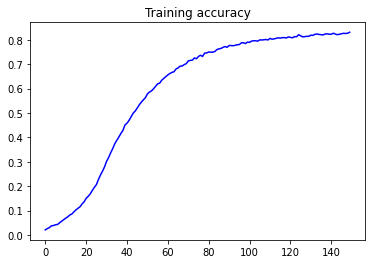

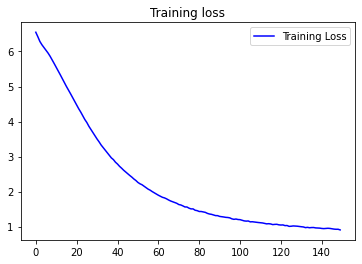

In [13]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(accuracy))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()


In [15]:
seed_text = "Summer"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)

Summer fears the lines of many dead delight clearer light night repair live still with good date report report seen were some gone torn must torn be decrease die shown brought on kings kings some part ' still ' was well bright ' should glance things day oppress'd with outworn hence wretched hate twain ' do write twain twain die go well well delight living hand go lips day do better decrease drink young days seem worth and bright sight here seem well new rare twain twain burn and loss still not so bright deem'd leaves hate quite near despise burn'd
